In [1]:
import pandas as pd
import numpy as np  


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import sklearn


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import optuna

import xgboost as xgb


In [3]:
solar_original_train = pd.read_csv('../data/external/solar_train.csv')
solar_original_train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [19]:
solar_pro_5 = pd.read_csv('../data/interim/solar_pro4_train_nt.csv')
solar_pro_5.drop(columns=['TimeSunSet', 'YearFraction'], inplace=True)
solar_pro_5.head()


,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,DayFraction
0,228.26,287.04,93,0.0024,0.514583,0.632153
1,1.22,280.37,93,0.2611,0.458333,0.837222
2,566.83,287.59,52,0.1135,0.500000,0.673866
3,447.70,284.26,96,0.1250,0.476389,0.385625
4,1.22,283.71,86,0.4854,0.490972,0.972465


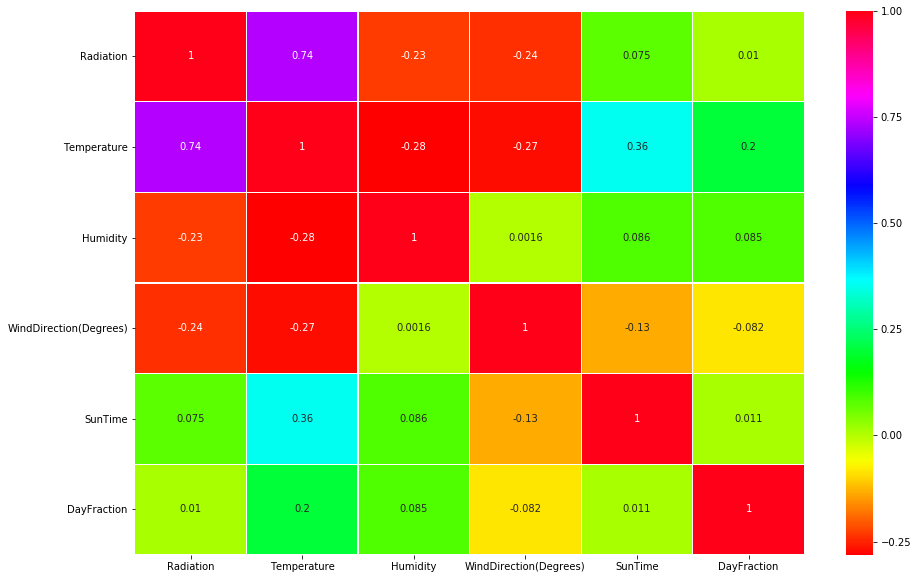

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(solar_pro_5.corr(), cmap = 'hsv', annot=True, linewidths=0.10)
plt.show()

In [22]:
solar_pro_5.to_csv('../data/interim/solar_pro5_train_nt.csv')

In [27]:
sol_pro5_test = pd.read_csv('../data/interim/solar_pro4_test_nt.csv')
sol_pro5_test.head()

,Temperature,Humidity,WindDirection(Degrees),SunTime,TimeSunSet,DayFraction,YearFraction
0,283.71,103,0.3946,0.521528,0.776389,0.013958,0.671233
1,283.71,103,0.4391,0.521528,0.776389,0.048681,0.671347
2,283.71,103,0.1102,0.521528,0.776389,0.052245,0.671347
3,283.71,103,0.3123,0.521528,0.776389,0.059097,0.671347
4,283.71,103,0.1835,0.521528,0.776389,0.079907,0.671347


In [28]:
sol_pro5_test.drop(columns=['TimeSunSet', 'YearFraction'], inplace=True)

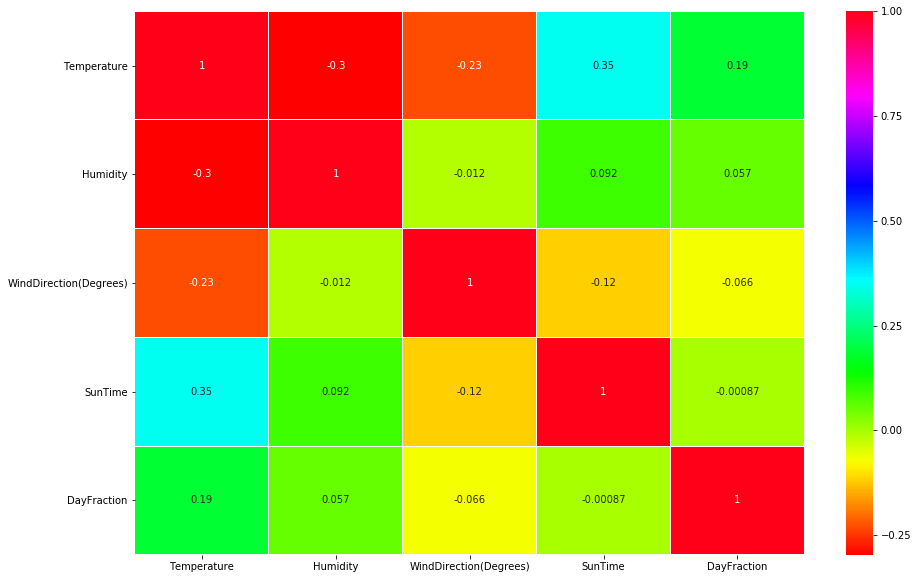

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(sol_pro5_test.corr(), cmap = 'hsv', annot=True, linewidths=0.10)
plt.show()

In [31]:
sol_pro5_test.to_csv('../data/interim/solar_pro5_test_nt.csv')